In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns

In [2]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
3256,3257,8125.5,1369.1,4053.7,1616.4,443.4,7951.5,4900.8,482.7,221284.0079,...,2.288,2.498,2.427,2.039,2.511,2.371,2.643,2.436,2.30889,62
2069,2070,7729.1,1357.1,3981.2,1616.2,595.6,6988.3,4155.9,521.6,200766.9588,...,2.231,2.645,2.297,1.901,2.410,2.258,2.668,2.346,2.33672,55
1254,1255,6419.5,912.0,3699.8,1351.8,497.5,6325.6,4182.0,337.3,184803.8063,...,2.505,2.454,2.365,2.013,2.477,2.379,2.694,2.514,2.44154,62
2753,2754,7708.2,1264.5,3895.8,1592.5,749.3,7605.0,4921.1,537.7,256382.1308,...,2.210,2.375,2.232,1.992,2.298,2.083,2.483,2.151,2.22100,47
2016,2017,7761.9,789.6,4154.0,1435.2,99.3,6739.5,3614.9,551.0,205707.8092,...,2.414,2.519,2.429,1.954,2.467,2.328,2.682,2.469,2.41862,65


In [3]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['Age'])
y = inputData['Age']


In [4]:
# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
from sklearn import linear_model
myLassoReg = linear_model.Lasso(alpha=0.1)
myLassoReg.fit(X_train,y_train)


Lasso(alpha=0.1)

In [6]:
# check the model's performance on unseen, test data
predictions = myLassoReg.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


r square value: 0.7735943219216199
mean absolute error (years): 7.66816904383907
mean square error: 91.97444832060957
root mean absolute error (years): 9.590330980764406


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

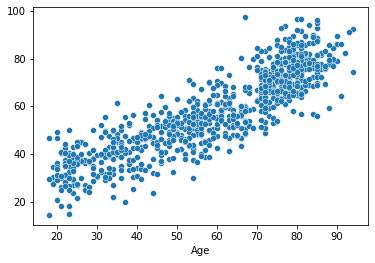

In [7]:
sns.scatterplot(y_test, predictions)

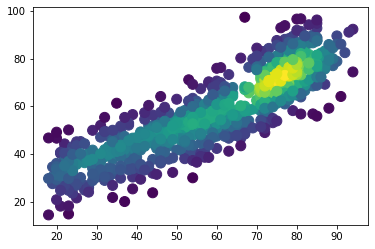

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()